## Project Requirements

📊 **Dataset Analysis** – Use Python to analyze Zomato’s restaurant dataset for customer preferences and trends.  
🚚 **Delivery Insights** – Compare the number of restaurants offering **online delivery vs. offline services**.  
🍽️ **Restaurant Popularity** – Identify which **types of restaurants** are most favored by the general public.  
💑 **Couple Dining Preferences** – Determine the **preferred price range** for couples dining out.  

## Import Libraries and Create Data Frame

Use Pandas, Numpy, Matplotlib and Seaborn libraries. Then, create data frame  of the dataset.

In [1]:
# Importing necessary Python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Creating the data frame
dataframe = pd.read_csv("/content/drive/MyDrive/LinkedInProjects/DataAnalysis/Datasets/Zomato-data-.csv")
print(dataframe.head())

                    name online_order book_table   rate  votes  \
0                  Jalsa          Yes        Yes  4.1/5    775   
1         Spice Elephant          Yes         No  4.1/5    787   
2        San Churro Cafe          Yes         No  3.8/5    918   
3  Addhuri Udupi Bhojana           No         No  3.7/5     88   
4          Grand Village           No         No  3.8/5    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


## Clean and Convert 'rate' Column

Clean the 'rate' column by handling 'New' and '/5' entries, then convert it to a numeric (float) data type for analytical purposes.


In [3]:
dataframe['rate'] = dataframe['rate'].replace('New', np.nan)
dataset = dataframe # Assign dataframe to dataset for subsequent operations to avoid NameError
dataset['rate'] = dataframe['rate'].astype(str).apply(lambda x: x.replace('/5', ''))
dataset['rate'] = pd.to_numeric(dataframe['rate'], errors='coerce')
print(dataframe['rate'].head())
print(dataframe['rate'].dtype)

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64
float64


## Clean and Convert 'approx_cost(for two people)' Column

Clean the 'approx_cost(for two people)' column by removing non-numeric characters (like commas) and convert it to a numeric data type (e.g., float or integer).


In [4]:
dataframe['approx_cost(for two people)'] = dataframe['approx_cost(for two people)'].astype(str).apply(lambda x: x.replace(',', ''))
dataset['approx_cost(for two people)'] = pd.to_numeric(dataframe['approx_cost(for two people)'], errors='coerce')
print(dataframe['approx_cost(for two people)'].head())
print(dataframe['approx_cost(for two people)'].dtype)

0    800
1    800
2    800
3    300
4    600
Name: approx_cost(for two people), dtype: int64
int64


## Standardize Column Names

Rename columns to a more consistent and readable format (e.g., lowercase, replace spaces with underscores, remove special characters) to facilitate easier data manipulation and analysis.


In [5]:
import re

new_columns = []
for col in dataframe.columns:
    col = col.lower()
    # Replace parentheses with content inside, preceded by an underscore
    col = re.sub(r'\s*\((.*?)\)\s*', r'_\1', col)
    # Replace spaces with underscores
    col = col.replace(' ', '_')
    # Remove any remaining non-alphanumeric or non-underscore characters
    col = re.sub(r'[^a-z0-9_]', '', col)
    # Replace multiple underscores with a single underscore
    col = re.sub(r'_{2,}', '_', col)
    new_columns.append(col)

dataset.columns = new_columns
print(dataset.columns)

Index(['name', 'online_order', 'book_table', 'rate', 'votes',
       'approx_cost_for_two_people', 'listed_in_type'],
      dtype='object')


## Analyze Online Delivery vs. Offline Services

Determine the proportion of restaurants that provide online delivery services versus those that do not, and visualize the results.


To analyze the online delivery trends, I will first count the occurrences of 'Yes' and 'No' in the 'online_order' column to understand the distribution of restaurants offering online services.



In [6]:
online_order_counts = dataset['online_order'].value_counts()
print("Counts of online order services:\n", online_order_counts)

Counts of online order services:
 online_order
No     90
Yes    58
Name: count, dtype: int64


To visualize the proportion of restaurants offering online delivery services, I will calculate the percentages from the previously obtained counts. Then, I will create a bar plot to display these proportions, ensuring the plot includes appropriate labels, a title, and percentages on the bars for clarity.



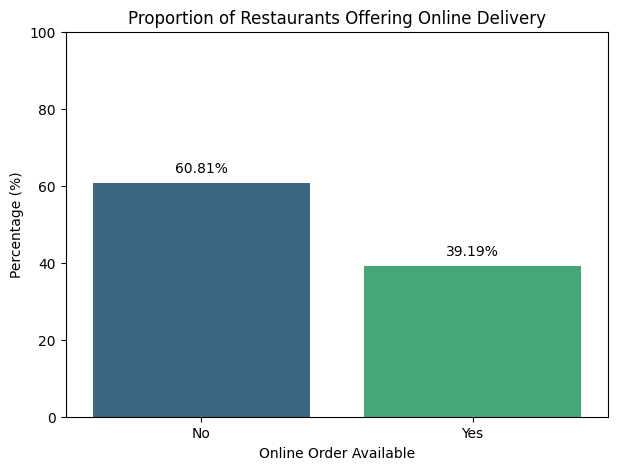

In [7]:
online_order_proportions = online_order_counts / online_order_counts.sum() * 100

plt.figure(figsize=(7, 5))
sns.barplot(x=online_order_proportions.index, y=online_order_proportions.values, hue=online_order_proportions.index, palette='viridis', legend=False)
plt.title('Proportion of Restaurants Offering Online Delivery')
plt.xlabel('Online Order Available')
plt.ylabel('Percentage (%)')
plt.ylim(0, 100)

for index, value in enumerate(online_order_proportions.values):
    plt.text(index, value + 2, f'{value:.2f}%', ha='center', va='bottom')

plt.show()

## Identify Most Favored Restaurant Types

Analyze the 'listed_in_type' column in conjunction with 'rate' and 'votes' to identify the most favored restaurant types by the general public, and visualize the findings.


To identify the most favored restaurant types, I will group the `dataset` DataFrame by `listed_in_type`, calculate the mean of `rate` and the sum of `votes` for each type, and store these aggregates in a new DataFrame called `restaurant_type_analysis`. Then, I will sort this DataFrame by both the average rate (descending) and total votes (descending) to prioritize highly rated and frequently reviewed restaurant types.



In [8]:
restaurant_type_analysis = dataset.groupby('listed_in_type').agg(
    mean_rate=('rate', 'mean'),
    total_votes=('votes', 'sum')
).reset_index()

restaurant_type_analysis = restaurant_type_analysis.sort_values(
    by=['mean_rate', 'total_votes'],
    ascending=[False, False]
)

print(restaurant_type_analysis.head(10))

  listed_in_type  mean_rate  total_votes
3          other   3.912500         9367
0         Buffet   3.842857         3028
1          Cafes   3.765217         6434
2         Dining   3.571818        20363


To visualize the most favored restaurant types by average rate, I will create a bar plot showing the 'mean_rate' for the top 10 restaurant types from the 'restaurant_type_analysis' DataFrame.



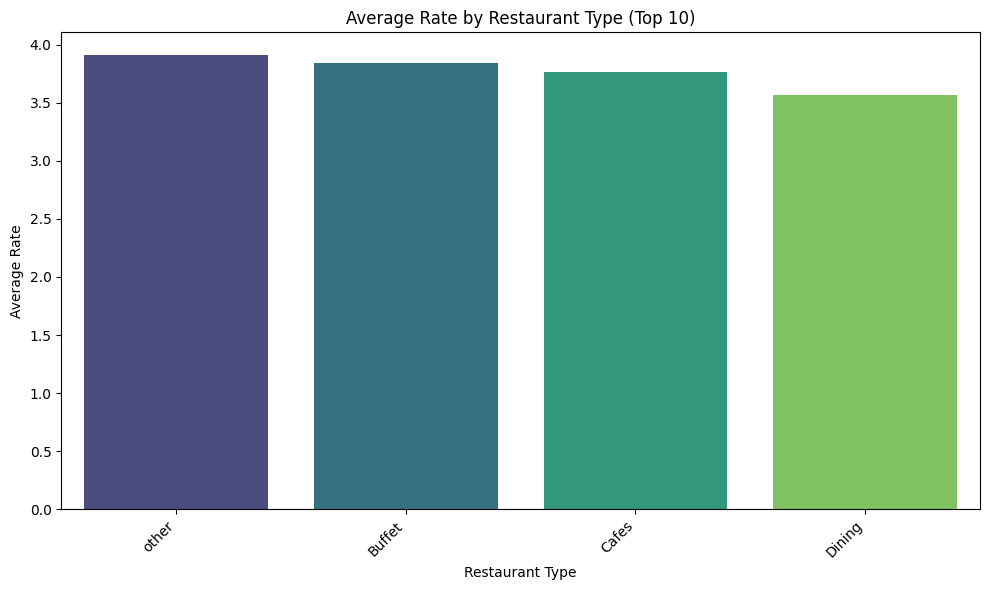

In [9]:
plt.figure(figsize=(10, 6))
sns.barplot(x='listed_in_type', y='mean_rate', data=restaurant_type_analysis.head(10), hue='listed_in_type', palette='viridis', legend=False)
plt.title('Average Rate by Restaurant Type (Top 10)')
plt.xlabel('Restaurant Type')
plt.ylabel('Average Rate')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

To visualize the total votes for the most favored restaurant types, I will create a bar plot showing the 'total_votes' for the top 10 restaurant types from the 'restaurant_type_analysis' DataFrame.


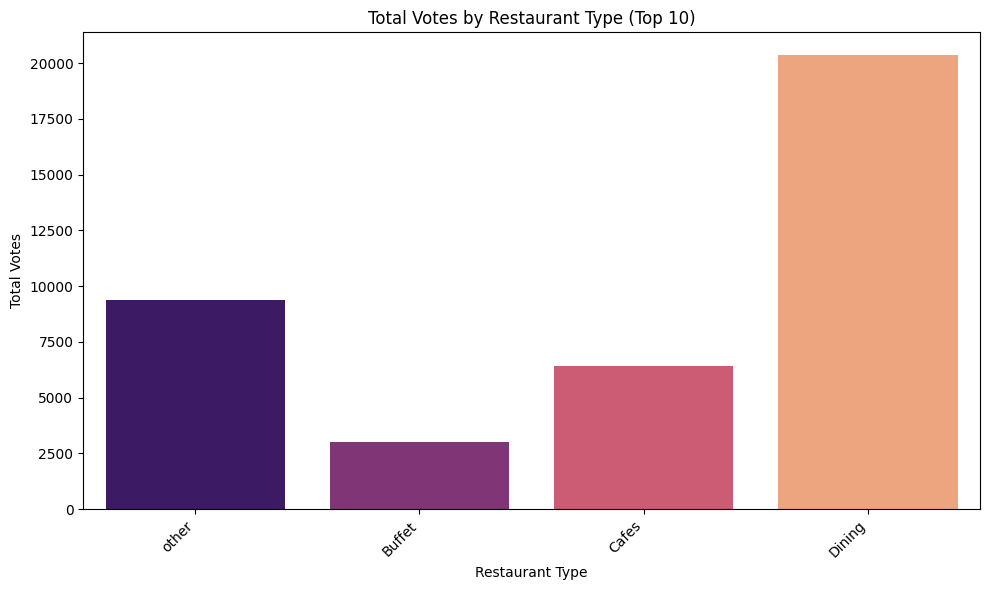

In [10]:
plt.figure(figsize=(10, 6))
sns.barplot(x='listed_in_type', y='total_votes', data=restaurant_type_analysis.head(10), hue='listed_in_type', palette='magma', legend=False)
plt.title('Total Votes by Restaurant Type (Top 10)')
plt.xlabel('Restaurant Type')
plt.ylabel('Total Votes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Analyze Price Range for Couples

Examine the 'approx_cost_for_two_people' column to understand the typical price range preferred by couples for dining out, and visualize the distribution.


To understand the typical price range, I will calculate and print the descriptive statistics (mean, median, min, max, quartiles) for the 'approx_cost_for_two_people' column.



In [11]:
cost_stats = dataset['approx_cost_for_two_people'].describe()
print("Descriptive Statistics for Approximate Cost for Two People:\n", cost_stats)

Descriptive Statistics for Approximate Cost for Two People:
 count    148.000000
mean     418.243243
std      223.085098
min      100.000000
25%      200.000000
50%      400.000000
75%      600.000000
max      950.000000
Name: approx_cost_for_two_people, dtype: float64


To visualize the distribution of the approximate cost for two people, I will create a histogram.



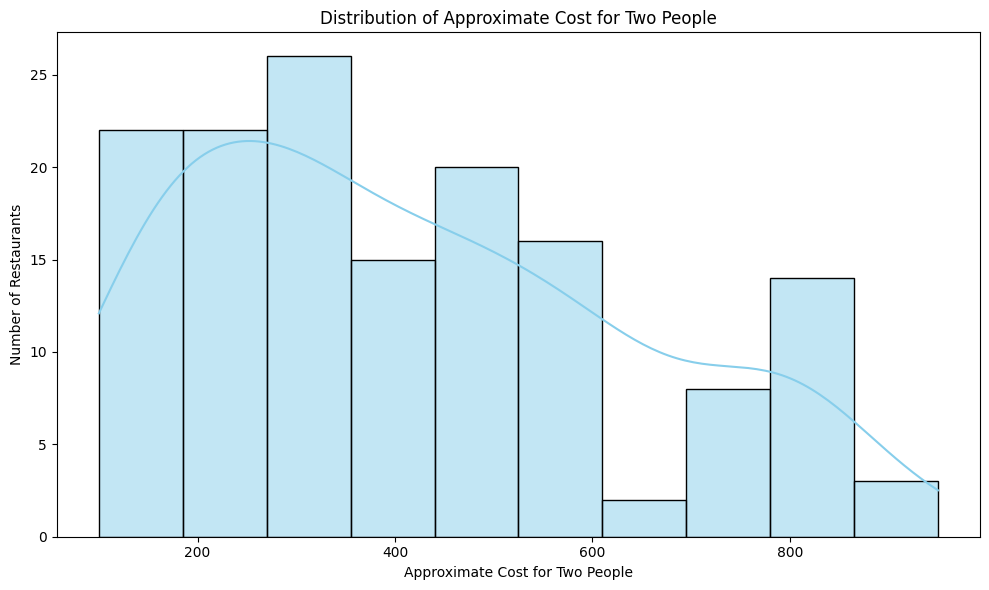

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(dataset['approx_cost_for_two_people'].dropna(), bins=10, kde=True, color='skyblue')
plt.title('Distribution of Approximate Cost for Two People')
plt.xlabel('Approximate Cost for Two People')
plt.ylabel('Number of Restaurants')
plt.tight_layout()
plt.show()

## Data Analysis Key Findings

*   **Online Delivery Trends**: The majority of restaurants, approximately 60.81\%, do not offer online delivery services, while 39.19\% do. This indicates a significant portion of the market relies more on offline services.
*   **Most Favored Restaurant Types**:
    *   Based on average rating, the 'other' category of restaurants received the highest mean rate of 3.91.
    *   Considering overall popularity by total votes, 'Dining' type restaurants garnered the highest number of votes, with 20,363 votes, suggesting a strong public engagement with this category.
    *   Other highly rated and voted categories include 'Buffet' and 'Cafes'.
*   **Typical Price Range for Couples**:
    *   The approximate cost for two people across restaurants ranges from \$100 to \$950.
    *   The average cost for two people is approximately \$418.24, with a median cost of \$400.
    *   Most restaurants fall within a price range of \$200 (25th percentile) to \$600 (75th percentile) for two people, indicating a common mid-range pricing strategy.